In [49]:
# Import Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pymysql as mysql
import warnings
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# customers_dataset

In [4]:
customers_df = pd.read_csv("/Users/Kayan/Desktop/ecommerce/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Number of customers per state
pd.DataFrame(customers_df.groupby(['customer_state'])['customer_id'].count().reset_index())

,customer_state,customer_id
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380
5,CE,1336
6,DF,2140
7,ES,2033
8,GO,2020
9,MA,747


In [6]:
# Number of customers per city
pd.DataFrame(customers_df.groupby(['customer_city'])['customer_id'].count().reset_index())

,customer_city,customer_id
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4114,xinguara,9
4115,xique-xique,3
4116,zacarias,2
4117,ze doca,5


# geolocation_dataset
I don't think we need geolocation data unless we plan to create some type of interactive map

# order_items_dataset

In [7]:
items_df = pd.read_csv("/Users/Kayan/Desktop/ecommerce/olist_order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
#Basic information about items_df
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
#Descriptive statistics for price and freight_value
items_df.describe()[['price','freight_value']]

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


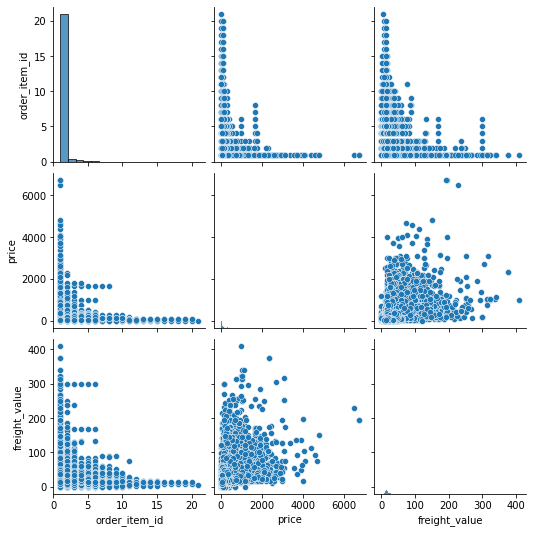

In [10]:
# exploring relationships
sns.pairplot(items_df)

<AxesSubplot:>

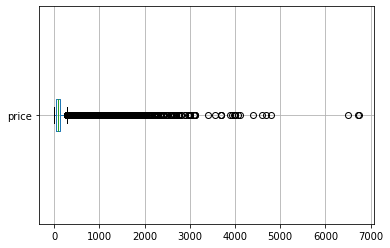

In [11]:
#Boxplot for price
items_df[['price']].boxplot(vert=False)

### How many orders per day?

In [12]:
# Change shipping date to date and time 
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])
items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [13]:
# Splitting the date part from DataFrame
items_df['Date'] = [d.date() for d in items_df['shipping_limit_date']]

# Splitting the time part from DataFrame
items_df['Time'] = [d.time() for d in items_df['shipping_limit_date']]

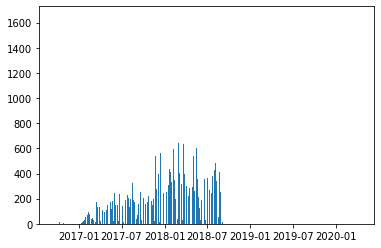

In [14]:
# Calculate total orders per day 
orders_per_day = items_df.groupby(['Date']).count().reset_index()
orders_per_day = pd.DataFrame( orders_per_day, columns = ['Date', 'order_id'])
orders_per_day.rename(columns = {'order_id':'Total Orders'}, inplace = True)

# Create barchart of total orders per day 
plt.bar(orders_per_day['Date'], orders_per_day['Total Orders'])
plt.show()

In [15]:
# explore product_id values 
print("There are", items_df['product_id'].nunique(), "unique products.")

There are 32951 unique products.


In [16]:
# explore seller_id values 
print("There are", items_df['seller_id'].nunique(), "unique sellers.")

There are 3095 unique sellers.


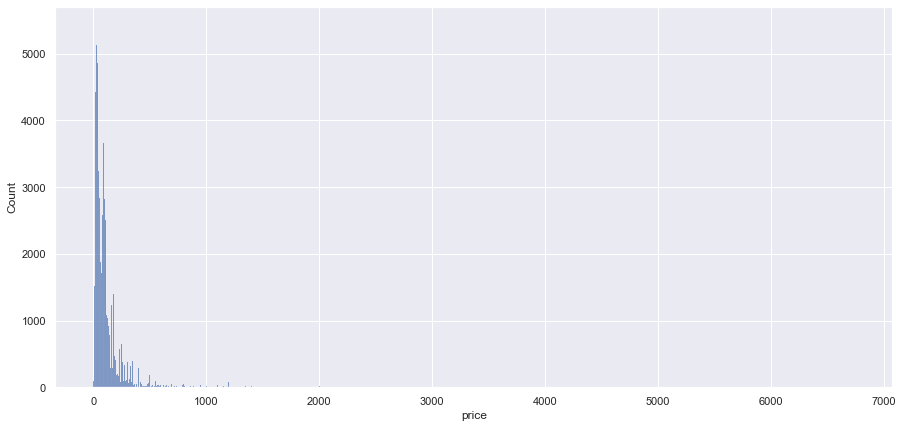

In [17]:
# price distribution

sns.set(rc={"figure.figsize":(15,7)}) 
sns.set(font_scale=1)
sns.histplot(items_df['price'])
plt.show()

<AxesSubplot:ylabel='Count'>

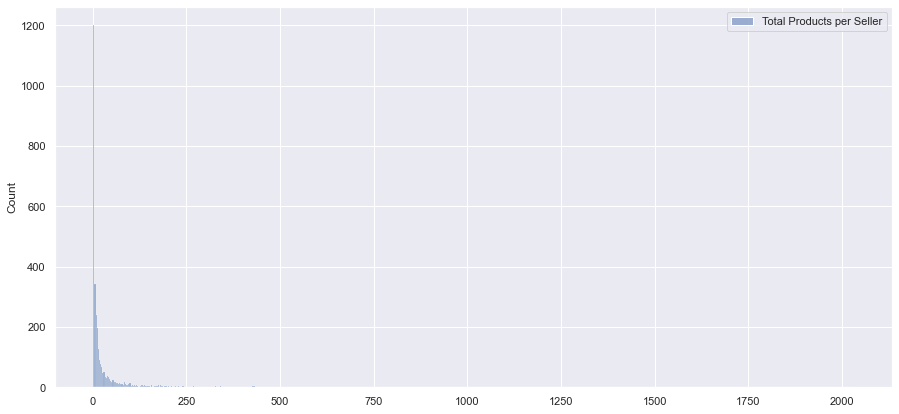

In [18]:
# How many products per seller? 
seller_products = items_df.groupby(['seller_id']).count().reset_index()
seller_products = pd.DataFrame(seller_products, columns = ['seller_id', 'product_id'])
seller_products.rename(columns = {'product_id':'Total Products per Seller'}, inplace = True)

# Create barchart of total orders per day 
sns.histplot(seller_products)

# payments_dataset

In [19]:
payments_df = pd.read_csv("/Users/Kayan/Desktop/ecommerce/olist_order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [93]:
# Total orders per payment type
num_payment_type=pd.DataFrame(payments_df.groupby(['payment_type'])['order_id'].count().reset_index())
num_payment_type

,payment_type,order_id
0,boleto,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


In [96]:
#Pie chart for percentage of each payment type
fig=px.pie(num_payment_type,values=num_payment_type['order_id'],names='payment_type',title='Percentages of payment type')
fig.show()

In [21]:
# Total payments per payment type 
payments_df.groupby(['payment_type'])['payment_value'].sum().reset_index()

,payment_type,payment_value
0,boleto,2869361.27
1,credit_card,12542084.19
2,debit_card,217989.79
3,not_defined,0.00
4,voucher,379436.87


<AxesSubplot:>

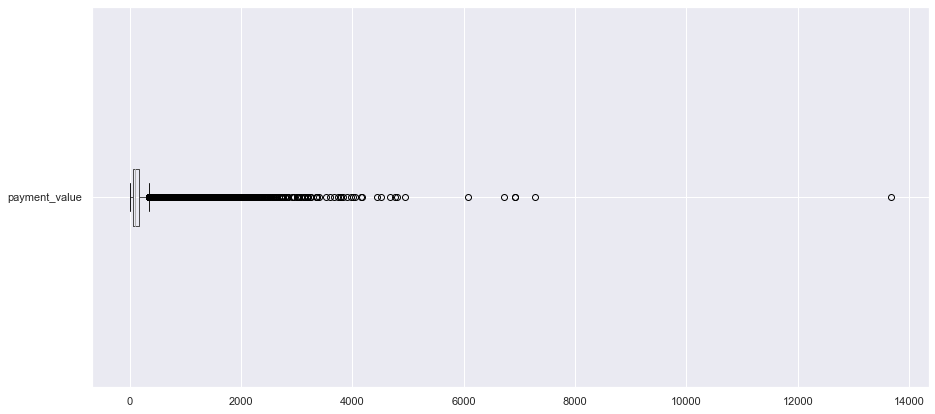

In [22]:
#boxplot for payment_value
payments_df[['payment_value']].boxplot(vert=False)

In [23]:
# Average number of payment installments per payment type 
payments_df.groupby(['payment_type'])['payment_installments'].mean().reset_index()

,payment_type,payment_installments
0,boleto,1.000000
1,credit_card,3.507155
2,debit_card,1.000000
3,not_defined,1.000000
4,voucher,1.000000


# reviews_dataset

In [24]:
reviews_df = pd.read_csv("/Users/Kayan/Desktop/ecommerce/olist_order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [25]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
reviews_df = reviews_df.dropna()
reviews_df.shape

(9839, 7)

<BarContainer object of 5 artists>

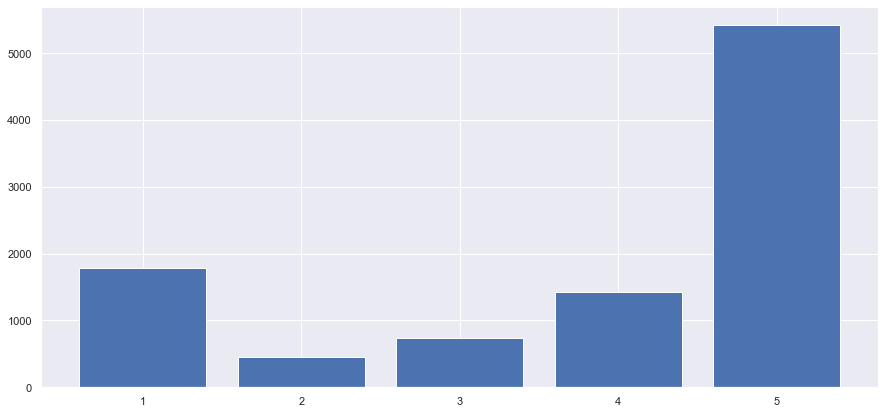

In [27]:
# Total orders per payment type, clearly need to balance this before we train on it
review_scores = pd.DataFrame(reviews_df.groupby(['review_score'])['order_id'].count().reset_index())
plt.bar(review_scores['review_score'], review_scores['order_id'])

# orders_dataset

In [28]:
orders_df = pd.read_csv("/Users/Kayan/Desktop/ecommerce/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# products_dataset

In [29]:
products_df = pd.read_csv("/Users/Kayan/Desktop/ecommerce/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# sellers_dataset

In [30]:
sellers_df = pd.read_csv("/Users/Kayan/Desktop/ecommerce/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [31]:
# Number of sellers per city
pd.DataFrame(sellers_df.groupby(['seller_city'])['seller_id'].count().reset_index())

,seller_city,seller_id
0,04482255,1
1,abadia de goias,1
2,afonso claudio,1
3,aguas claras df,1
4,alambari,1
...,...,...
606,volta redonda,2
607,votorantim,4
608,votuporanga,4
609,xanxere,2


In [32]:
# Number of seller per state
pd.DataFrame(sellers_df.groupby(['seller_state'])['seller_id'].count().reset_index())

,seller_state,seller_id
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


<AxesSubplot:xlabel='seller_state', ylabel='count'>

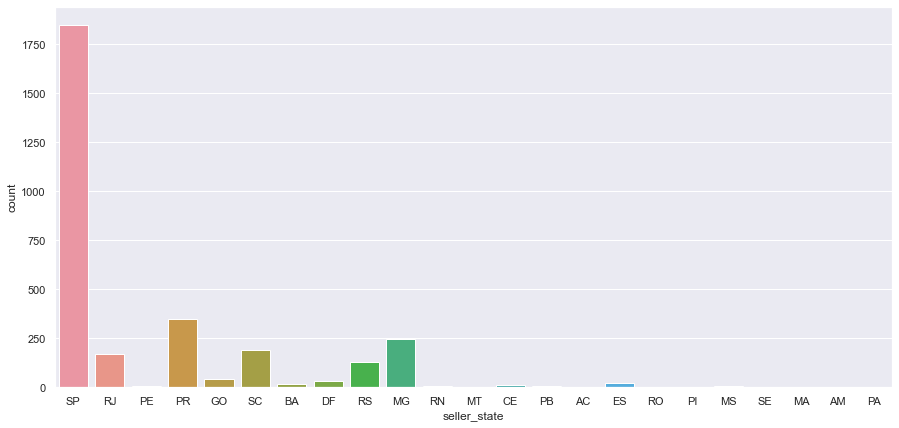

In [33]:
sns.countplot(sellers_df['seller_state'])

# category_name_translation_data

In [44]:
# I think we should use this as a dictionary 
translation_df = pd.read_csv("/Users/Kayan/Desktop/ecommerce/product_category_name_translation.csv")
translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [97]:
# get product id match to product category
ordered_products = orders_df.merge(items_df,left_on = 'order_id',right_on = 'order_id',how = 'inner'
).merge(
    products_df,
    left_on='product_id',
    right_on='product_id',
    how='inner'
).merge(
    translation_df,
    left_on='product_category_name',
    right_on='product_category_name',
    how='inner'
)

In [115]:
#Count all the product items
top_products = ordered_products[['product_category_name_english']].value_counts().reset_index().rename(columns={0:'count'})
top_products

,product_category_name_english,count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


In [116]:
# bar chart for all product items selling number
fig = px.bar(top_products,x='product_category_name_english', y='count')
fig.show()

In [117]:
# count top 10 product items
top10_products = ordered_products[['product_category_name_english']].value_counts()[:10].reset_index().rename(columns={0:'count'})
top10_products

,product_category_name_english,count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


In [118]:
# Top 10 product items
fig = px.bar(top10_products,x='product_category_name_english', y='count')
fig.show()